<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Statistics for Machine Learning <br>MPA-1
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

##  Table of Content

1. **[Understand the Dataset](#data)**
2. **[Measures of Central Tendency](#ct)**
3. **[Measures of Dispersion](#md)**
4. **[Skewness and kurtosis](#sk)**
5. **[Correlation](#corr)**
6. **[Probability and Distributions](#prob)**

**Import the required libraries**

In [1]:
# import pandas
import pandas as pd

# import numpy
import numpy as np

# import matplotlib.pyplot
import matplotlib.pyplot as plt

# import seaborn
import seaborn as sns

# to suppress the warnings
import warnings
warnings.filterwarnings('ignore')

**Load the adults income dataset and print first five observations**

In [2]:
df = pd.read_excel("adult_income.xlsx")

In [3]:
#Adding few more steps to understand the data
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,1,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,1,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,1,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,1,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,1,0,3900,40,United-States,<=50K


In [4]:
df.shape

(32561, 15)

In [5]:
df.describe()

,age,fnlwgt,education.num,sex,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,0.330795,1077.648844,87.303830,40.431344
std,13.640433,1.055500e+05,2.572720,0.470506,7385.292085,402.960219,12.358681
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,1.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,1.000000,99999.000000,4356.000000,99.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  int64 
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


<a id="data"> </a>
## 1. Understand the Dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Find out the numerical and categorical variables in the data. If any variable is wrongly identified, do the needful
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [7]:
num_data=df.select_dtypes(include=np.number)
num_data
#From the below Numercial variables 'sex' is observed to be categorical column

,age,fnlwgt,education.num,sex,capital.gain,capital.loss,hours.per.week
0,90,77053,9,1,0,4356,40
1,82,132870,9,1,0,4356,18
2,66,186061,10,1,0,4356,40
3,54,140359,4,1,0,3900,40
4,41,264663,10,1,0,3900,40
...,...,...,...,...,...,...,...
32556,22,310152,10,0,0,0,40
32557,27,257302,12,1,0,0,38
32558,40,154374,9,0,0,0,40
32559,58,151910,9,1,0,0,40


In [8]:
#Converting the Numerical variable to Categorical variable, 
#such that they can be used for categorical operations like grouping

df['sex'] = pd.Categorical(df.sex)
df['sex'].replace({1:'Male', 0:'Female'}, inplace= True)

In [9]:
#Finding the categorical variables in the given data using afer performing necessary varialbe classification
cat_data=df.select_dtypes(exclude=np.number)
cat_data 

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
0,?,HS-grad,Widowed,?,Not-in-family,White,Male,United-States,<=50K
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Male,United-States,<=50K
2,?,Some-college,Widowed,?,Unmarried,Black,Male,United-States,<=50K
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Male,United-States,<=50K
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Male,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,United-States,<=50K
32557,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Male,United-States,<=50K
32558,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Female,United-States,>50K
32559,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Male,United-States,<=50K


In [10]:
# Checking the variable types before proceeding further 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             32561 non-null  int64   
 1   workclass       32561 non-null  object  
 2   fnlwgt          32561 non-null  int64   
 3   education       32561 non-null  object  
 4   education.num   32561 non-null  int64   
 5   marital.status  32561 non-null  object  
 6   occupation      32561 non-null  object  
 7   relationship    32561 non-null  object  
 8   race            32561 non-null  object  
 9   sex             32561 non-null  category
 10  capital.gain    32561 non-null  int64   
 11  capital.loss    32561 non-null  int64   
 12  hours.per.week  32561 non-null  int64   
 13  native.country  32561 non-null  object  
 14  income          32561 non-null  object  
dtypes: category(1), int64(6), object(8)
memory usage: 3.5+ MB


<a id="ct"> </a>
## 2. Measures of Central Tendency

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. What is the average age of males and females in the data?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [11]:
#To find out average age of males and females, grouping needs to be done on 'sex' categorical variable 
# and apply mean() on individual Gender
df.groupby(by=df['sex'])['age'].mean().round()

sex
Female    39.0
Male      37.0
Name: age, dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Identify the qualification of most of the individuals </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [12]:
#Using mode to find out the qualification of most of the individuals as it is to find max frequency
most_quafn = df['education'].mode()
print("Qualification of most of the individuals: ",  most_quafn)

Qualification of most of the individuals:  0    HS-grad
Name: education, dtype: object


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4
                  . Find the middle most observation of age for different working class</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [13]:
##Using median() to find out the middle most observation of age
df.groupby(by=df['workclass'])['age'].median()

workclass
?                   35.0
Federal-gov         43.0
Local-gov           41.0
Never-worked        18.0
Private             35.0
Self-emp-inc        45.0
Self-emp-not-inc    44.0
State-gov           39.0
Without-pay         57.0
Name: age, dtype: float64

<a id="md"> </a>
## 3. Measures of Dispersion

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Which occupation has more variability in the working hours</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [14]:
df.groupby(by=df['occupation'])['hours.per.week'].var().max()

299.98781409504363

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> 6. What is the range of the middle 50% of working hours per week?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [15]:
q1 = df['hours.per.week'].quantile(0.25)
q3 = df['hours.per.week'].quantile(0.75)

iqr= q3 - q1
print(iqr)

5.0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Are there any variables which can be excluded from further analysis based on their variability?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [16]:
upper_limit= q3 + 1.5*iqr
lower_limit= q1 - 1.5*iqr
print(upper_limit)
print(lower_limit)
hardworkers_list=[]
lazyworkers_list=[]
for i in df['hours.per.week']:
    if i > upper_limit:
        hardworkers_list.append(i)
    elif i < lower_limit:
        lazyworkers_list.append(i)
#print(hardworkers_list)
#print(lazyworkers_list)

print("number of higher working hours which can be excluded from further analysis based on their variability: ", len(hardworkers_list))
print("number of lower working hourswhich can be excluded from further analysis based on their variability: ", len(lazyworkers_list))


52.5
32.5
number of higher working hours which can be excluded from further analysis based on their variability:  3492
number of lower working hourswhich can be excluded from further analysis based on their variability:  5520


<a id="sk"> </a>
## 4. Skewness and kurtosis

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Is there any negatively skewed feature. Support your answer with a metric and the plot</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [17]:
print(df.skew())
#from the below we see that education.num is negatively skewed 

age                0.558743
fnlwgt             1.446980
education.num     -0.311676
capital.gain      11.953848
capital.loss       4.594629
hours.per.week     0.222241
dtype: float64


<Axes: xlabel='education.num', ylabel='Density'>

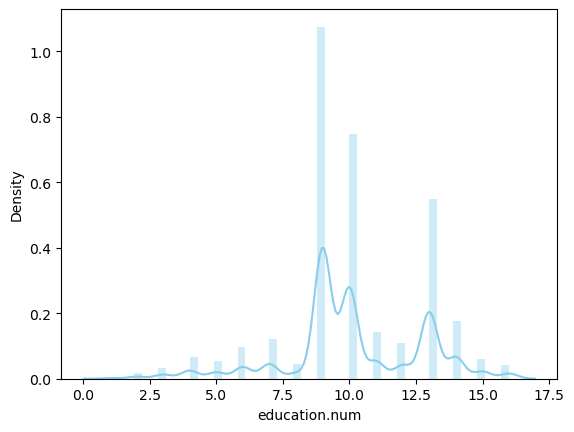

In [18]:
sns.distplot( df['education.num'], color="skyblue", hist=True)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Find the kurtosis of all the variables, and give appropriate interpretation</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [19]:
df.kurt()
#from the below 
# age is platykurtic
# and fnlwgt, education.num, capital.gain, capital.loss, hours.per.week are leptokurtic
# and there are no mesokurtic

age                -0.166127
fnlwgt              6.218811
education.num       0.623444
capital.gain      154.799438
capital.loss       20.376802
hours.per.week      2.916782
dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Identify the presence of extreme values in age using visualization techniques
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<Axes: >

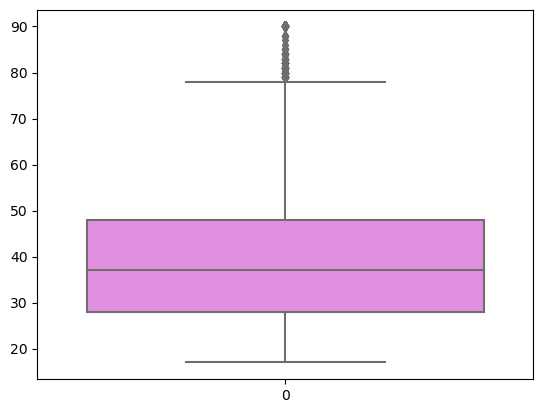

In [20]:
sns.boxplot( df['age'], color="violet")
# from the below box plot we see that all the ages above 80 are extreme values

<a id="corr"> </a>
## 5. Correlation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Is there any effect of age on the working hours of a person?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<Axes: >

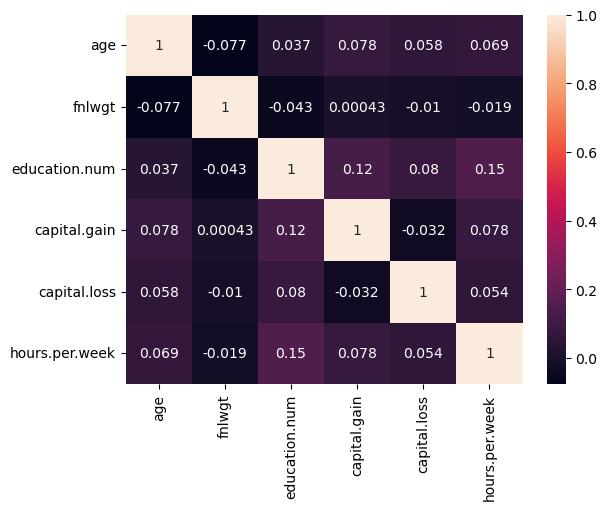

In [21]:
#sns.scatterplot(y=df['age'],x=df['hours.per.week'], color = 'green')
sns.heatmap(df.corr(),annot=True)
# From the below heatmap we see that Correlation between 'age' and 'Weekly working hours' is very less. 

<a id="corr"> </a>
## 6. Probability and Distributions

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. The probabilities that “A” and “B” will tell the truth are 2/3 and 4/5 respectively. What is the probability that i) they agree with each other ii) they contradict each other while giving a witness in the court.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [22]:
# In order for both A and B to agree either they both should speak Truth or they both should speak lies, 
# so both probabilities needed be added
# 1) Probablity that they both speak truth is (2/3)*(4/5)
# 2) Probablity that they both speak lies is (1/3)*(1/5)
# So the probability that they agree with each by either ther speaking truth or flase is 
((2/3)*(4/5))+((1/3)*(1/5))

0.6

In [23]:
# and the probability that they contradict with each other is compliment of they agree with each other
1 - 0.6

0.4

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13.A city affected by 3 cyclones in a year on an average. Find the probability if the same city will getting affected by exactly 2 cyclones in the upcoming year </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [24]:
# Applying poisson distribution
import scipy.stats as stats
cyclone_avg = 3
cyclone_prob = 2
p1 = stats.poisson.pmf(cyclone_avg,cyclone_prob)
print(p1)

0.18044704431548356


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14.If an athlete attended 6 olympics in his lifetime. Find the probability if he exactly have 2 wins </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [25]:
#Applying Binomial Distribution
attended=6
prob=0.5 #(1/2 win or loose, this is assumed as it not available from the question)
desired_wins=2
wins_probability = stats.binom.pmf(desired_wins,attended,prob)
print(wins_probability)

0.23437500000000008


# With this the assignment questions are done.. However below extended steps are done to study the data and come up with inferences